In [53]:
import pandas as pd
import datetime
import warnings

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_rows', 500)
warnings.filterwarnings('ignore')

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## Base Knowledge
- 주문 데이터는 7:00AM ~ 7:00AM 기준으로 영업일로 본다.
- 에러 정보가 있다. `is_error_exists` 컬럼을 확인 

In [2]:
order_contents = pd.read_csv('order_contents_information.csv')
order_contents.shape

(622465, 5)

In [63]:
order_contents.to_csv('order_contents_information.csv', encoding='utf-8', index=False)

In [62]:
order_contents.head()

,order_id,price,quantity,good_code,good_category
0,1,10000.00000,1,0,식사류
1,2,10000.00000,1,1,순대국밥
2,3,9000.00000,1,2,순대국밥
3,4,15900.00000,1,3,고기류
4,4,3900.00000,1,4,메뉴숨기기


In [5]:
orders = pd.read_csv('orders.csv')
orders.shape

(380751, 6)

In [6]:
orders.head()

,id,store_code,time_order,is_paid_order,is_first_order,is_error_exists
0,1,store_0,2022-11-01 07:09:00,False,True,False
1,2,store_1,2022-11-01 07:12:00,False,True,False
2,3,store_2,2022-11-01 07:19:00,False,True,False
3,4,store_3,2022-11-01 07:28:00,False,False,False
4,5,store_4,2022-11-01 07:36:00,False,True,False


# 분석 과제

## 1. 일별 데이터 그래프 시각화
주문에 대한 기본 정보는 다음과 같습니다.
-  일일 평균 주문 수: 12,691
-  주중 일일 평균 주문 수: 11,500
-  주말 일일 평균 주문 수: 15,968

11월 한달 동안의 주문 추이는 일주일 단위로 패턴을 보이는 것을 확인할 수 있습니다. 
- 빨간색은 주말(금, 토) 파란색은 평일(일~목)을 표현하고 있습니다. 매주 토요일에 주문이 가장 많이 발생했으며, 일요일보다는 금요일에 주문이 많이 발생한 것을 확인할 수 있습니다. 티오더 태블릿이 외식업체에 많은 것으로 미루어봤을 때, 일요일보다는 금요일에 약속을 많이 잡아서 그렇지 않을까 조심스럽게 추측해볼 수 있을 것 같습니다.
- 일별 에러율은 11월 25일에 크게 증가하는 모습을 보였지만 그 외에는 특별한 추이를 보이지 않습니다. 

In [7]:
df = pd.read_clipboard()

In [8]:
daily = df

In [9]:
daily.head()

,business_day,order_count_all,error_count_all,error_rate_all
0,2022-11-01,"9,651",13,0.00135
1,2022-11-02,"10,082",9,0.00089
2,2022-11-03,"10,689",8,0.00075
3,2022-11-04,"15,802",14,0.00089
4,2022-11-05,"19,352",14,0.00072


In [10]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   business_day     30 non-null     object 
 1   order_count_all  30 non-null     object 
 2   error_count_all  30 non-null     int64  
 3   error_rate_all   30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [11]:
def convertStrToDateTime(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')

In [12]:
def convertDatetimeToStr(x):
    return datetime.datetime.strftime(x, '%Y-%m-%d')

In [13]:
def isWeekend(x):
    if x.weekday() in (4, 5):
        return 1
    return 0

In [14]:
daily['datetime'] = daily['business_day'].apply(convertStrToDateTime)
daily['is_weekend'] = daily['datetime'].apply(isWeekend)

In [15]:
print(daily.shape)
daily.head(10)

(30, 6)


,business_day,order_count_all,error_count_all,error_rate_all,datetime,is_weekend
0,2022-11-01,"9,651",13,0.00135,2022-11-01,0
1,2022-11-02,"10,082",9,0.00089,2022-11-02,0
2,2022-11-03,"10,689",8,0.00075,2022-11-03,0
3,2022-11-04,"15,802",14,0.00089,2022-11-04,1
4,2022-11-05,"19,352",14,0.00072,2022-11-05,1
5,2022-11-06,"11,732",13,0.00111,2022-11-06,0
6,2022-11-07,"8,991",7,0.00078,2022-11-07,0
7,2022-11-08,"9,870",6,0.00061,2022-11-08,0
8,2022-11-09,"10,485",11,0.00105,2022-11-09,0
9,2022-11-10,"11,214",7,0.00062,2022-11-10,0


In [16]:
daily['order_count_all'].replace({',': ''}, regex=True, inplace=True)
daily['order_count_all'] = daily['order_count_all'].astype(int)

In [17]:
average_daily = daily['order_count_all'].sum()/daily.shape[0]
average_daily_weekday = daily['order_count_all'][daily['is_weekend']==0].sum()/daily['order_count_all'][daily['is_weekend']==0].count()
average_daily_weekend = daily['order_count_all'][daily['is_weekend']==1].sum()/daily['order_count_all'][daily['is_weekend']==1].count()

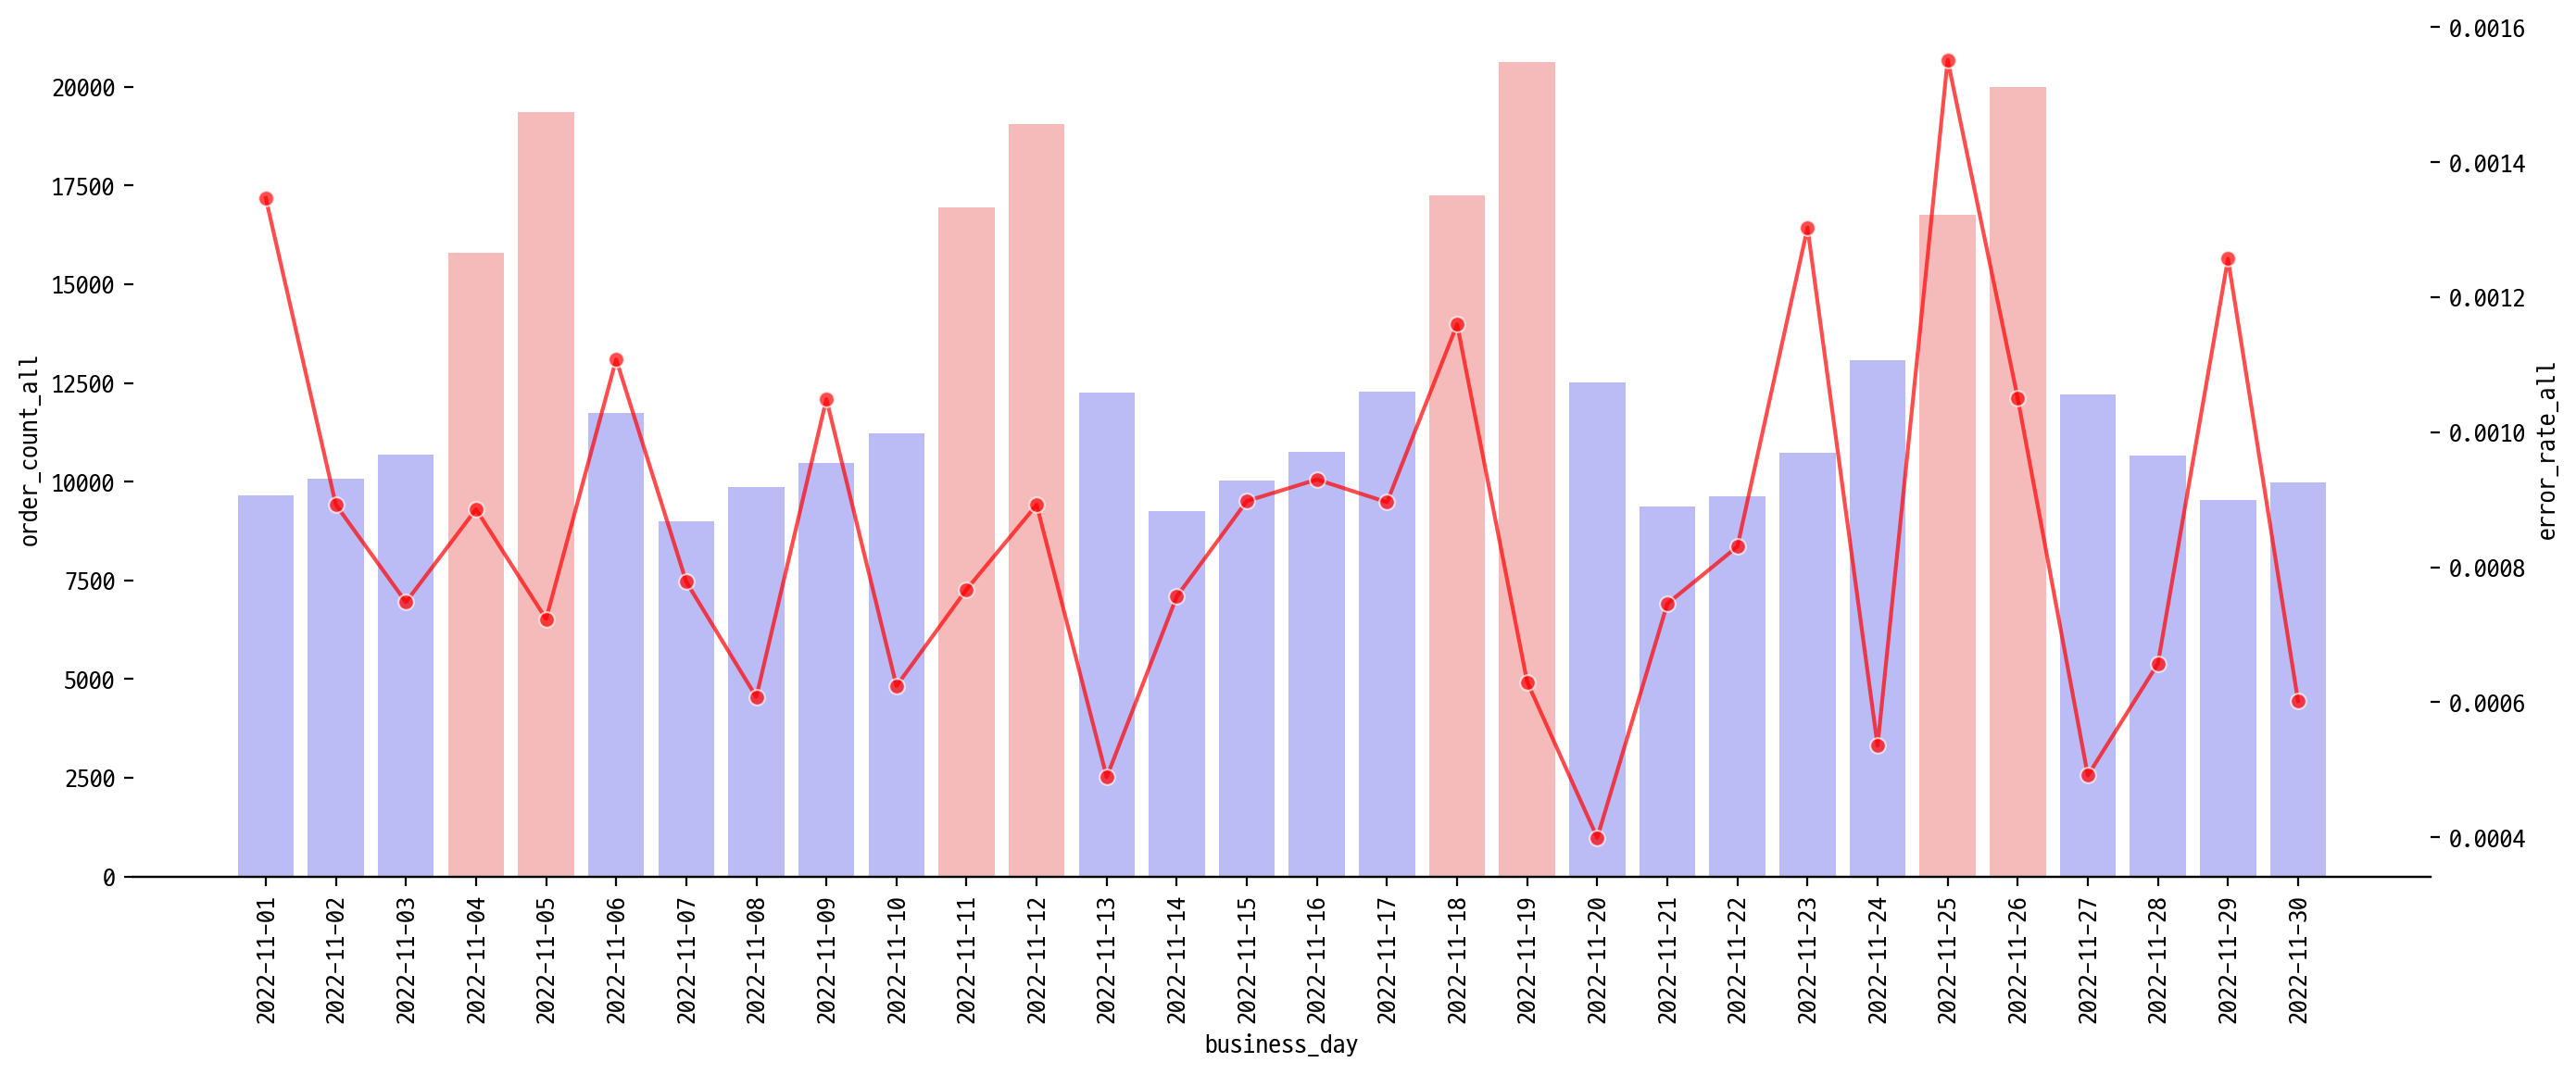

In [26]:
fig, ax1 = plt.subplots(figsize=(16,6), dpi=200)

weekend_colormap = ['red' if x == 1 else 'blue' for x in daily['is_weekend']]

sns.barplot(data = daily, x='business_day', y='order_count_all', alpha=0.3, palette=weekend_colormap, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.despine(left=True)
                           
ax2 = ax1.twinx()
sns.lineplot(data = daily, x='business_day', y='error_rate_all', marker='o', color='red', alpha=0.7, ax=ax2)
sns.despine(left=True)

plt.show()

## 2. 12월 1일 ~ 3일까지 주문수 예측
주문 수는 시계열 데이터로 표현이 되고 있으며 이를 예측하는 방법은 다양합니다. 단순 평균 계산, 전통적인 시계열 통계 모델(Moving Average, Exponential Smoothing, ARIMA), Prophet 모델, 회귀분석, Seuqence 데이터를 다루는 딥러닝 모델(RNN, LSTM, Transformer)을 사용할 수 있습니다. 이 외에도 여러 예측 방법론이 존재하겠지만 이번 분석에서는 간단하게 몇가지 분석 방법만 사용해보도록 하겠습니다.

단순 평균, 시계열 모델, 딥러닝 모델을 사용한 예측 결과는 아래와 같습니다.
|날짜|단순 평균 모델|시계열 모델|딥러닝 모델|
|---|---|---|---|
|2022-12-01|11,811|13,069|12,317|
|2022-12-02|16,686|16,756|17,145|
|2022-12-03|19,756|19,991|19,654|


#### 1) 단순 평균 계산 
11월 주문 수의 추이를 봤을 때는 금요일 ,토요일에 대한 효과가 주기적으로 나타나는 것을 확인할 수 있습니다. 12월 1~3일은 목, 금, 토요일입니다. 11월의 목, 금, 토요일 데이터를 평균하여 대략적인 주문 수를 예측해볼 수 있습니다.

<b>예상 주문수</b>
- 12월 1일(목): 11,811
- 12월 2일(금): 16,686
- 12월 3일(토): 19,756

In [230]:
daily['weekday_num'] = daily['datetime'].apply(lambda x : x.weekday())

In [239]:
target_weekday = [3, 4, 5] # 3목 ,4금, 5토
daily[daily['weekday_num'].isin(target_weekday)][['weekday_num', 'order_count_all']].groupby('weekday_num').mean()

,order_count_all
weekday_num,
3,11810.75
4,16685.75
5,19756.00


#### 2) 시계열 모델을 활용한 예측 

<b>예상 주문수</b>
- 12월 1일(목): 13,069
- 12월 2일(금): 16,756
- 12월 3일(토): 19,991

https://assaeunji.github.io/statistics/2021-09-08-arimapdq/

In [242]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [266]:
df = daily[['datetime', 'order_count_all']].copy()
df['datetime'] = pd.to_datetime(df['datetime'])  # 날짜 열을 날짜 형식으로 변환
df.set_index('datetime', inplace=True)  # 날짜를 인덱스로 설정

# ARIMA 모델 파라미터 선택
# m은 주기로 7로 설정하면 7일이 된다. 
model = auto_arima(df, seasonal=True, m=7, freq=df.index.inferred_freq, suppress_warnings=True)

# ARIMA 모델 피팅
order = model.order
seasonal_order = model.seasonal_order
sarimax_model = SARIMAX(df, order=order, seasonal_order=seasonal_order, freq=df.index.inferred_freq)
sarimax_fit = sarimax_model.fit()

# 미래 주문 수량 예측
forecast = sarimax_fit.get_forecast(steps=3)  # 3일 예측
forecast_values = forecast.predicted_mean
print(forecast_values)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.07446D+00    |proj g|=  4.06722D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      7      1     0     0   7.577D-07   6.060D+00
  F =   6.0596428357895773     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2022-12-01    13069.0
2022-12-02    16756.0
2022-12-03    19991.0
Freq: D, Name: predicted_mean, dtype: float64


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.


#### 3) LSTM을 활용한 예측 
딥러닝에서 sequence 데이터를 다룰 때 사용하는 모델인 LSTM을 사용해서도 주문 수를 예측할 수 있습니다. 간단하게 모델링을 하여 예측값을 확인해보도록 하겠습니다.

<b>예상 주문수</b>
- 12월 1일(목): 12,317
- 12월 2일(금): 17,145
- 12월 3일(토): 19,654


In [267]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

Epoch 1/50
23/23 [==============================] - 0s 1ms/step - loss: 0.2161
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1668
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 4/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1069
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0959
Epoch 6/50
23/23 [==============================] - 0s 941us/step - loss: 0.0921
Epoch 7/50
23/23 [==============================] - 0s 988us/step - loss: 0.0909
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0881
Epoch 9/50
23/23 [==============================] - 0s 975us/step - loss: 0.0873
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0837
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0812
Epoch 12/50
23/23 [==============================] - 0s 971us/step - loss: 0.0770
Epoch 13/50
23/23 [======================

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:

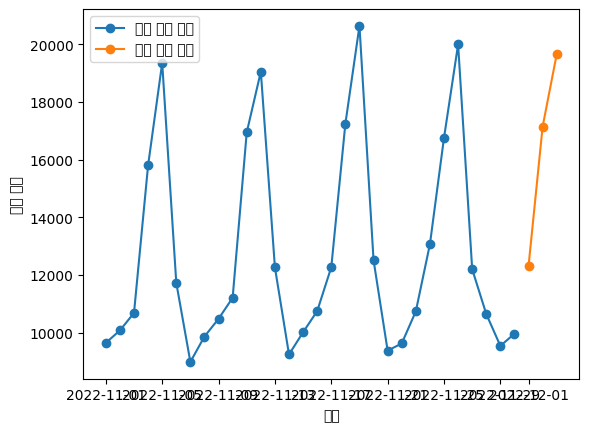

In [278]:
df = daily[['datetime', 'order_count_all']].copy()
df['datetime'] = pd.to_datetime(df['datetime'])  # 날짜 열을 날짜 형식으로 변환
df.set_index('datetime', inplace=True)  # 날짜를 인덱스로 설정

# 데이터 스케일링 (0과 1 사이로 스케일링)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 데이터를 시퀀스로 변환 (X: 입력, y: 출력)
look_back = 7  # 예: 7일치 데이터를 사용
X, y = [], []

for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back])
    y.append(scaled_data[i+look_back])

X, y = np.array(X), np.array(y)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')  # 평균 제곱 오차를 손실 함수로 사용

# 모델 훈련
model.fit(X, y, epochs=50, batch_size=1)

# 미래 예측을 위한 데이터 생성
future_data = scaled_data[-look_back:]  # 마지막 7일치 데이터 가져오기
future_predictions = []

# 12월 1일부터 12월 3일까지 예측
for i in range(3):
    future_input = future_data[-look_back:].reshape(1, look_back, 1)
    prediction = model.predict(future_input)
    future_data = np.append(future_data, prediction, axis=0)
    future_predictions.append(prediction)

# 스케일 역변환
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# 예측 결과 출력
print("미래 주문 수량 예측:")
for i, date in enumerate(pd.date_range(start='2022-12-01', periods=3)):
    print(f"{date}: {future_predictions[i][0]:.2f}")

# 예측 그래프 출력
plt.plot(df.index, df['order_count_all'], label='실제 주문 수량', marker='o')
plt.plot(pd.date_range(start='2022-12-01', periods=3), future_predictions, label='예측 주문 수량', marker='o')
plt.xlabel('날짜')
plt.ylabel('주문 수량')
plt.legend()
plt.show()

## 3. 하루 주문 중 주류가 가장 많이 팔렸을끼?

### 0) 하루 주문 중 주류가 가장 많이 팔렸다의 의미 
주류가 가장 많이 팔렸다는 것에 대한 상세한 정의가 필요합니다. 판매 금액이 높은건지, 판매 수량이 많은건지 등 여러 기준이 있을 수 있다고 생각합니다. 이를 명확하게 하기 위한 정의가 필요합니다. 하루라는 단어도 비슷한 맥락에서 정의가 필요합니다. 이번 분석에서는 판매 금액, 판매 수량을 모두 고려하였으며, 하루라는 의미는 단순하게 주중, 주말로 나눠서 진행하였습니다.


### 1) 카테고리 분류하기
주류가 가장 많이 팔렸을 것이라는 주장을 데이터로 뒷받침 하기 위해서는 주류와 주류가 아닌 항목들에 대해서 그룹핑을 해서 데이터를 집계할 수 있어야 합니다. 이를 위해서 주문 품목에 대한 카테고리가 있어야합니다. 
현재 데이터의 `good_category` 컬럼은 명확하게 주류를 묶을 수 있는 컬럼은 아닙니다. 왜냐하면 해당 컬럼에 주류와 관련해서 주류, 맥주, 소주, 맥주&소주, 하이볼, 막걸리 등 여러 값이 존재하기 때문입니다. 주류뿐만 아니라 비주류 항목도 같은 현상을 보이고 있습니다. 주류가 가장 많이 팔렸다는 것을 데이터로 확인하기 위해서는 단순하게 주류, 비주류에 대한 구분으로 끝나서는 안되고 비주류에 대해서도 세세한 카테고리화가 필요합니다. 그래야 다른 품목들에 비해 주류가 많이 팔린다는 것에 대한 적합한 근거가 될 수 있습니다.

카테고리를 하는 작업을 위해서 몇 가지 방법이 시도될 수 있습니다. 
1. 직접 카테고리를 분류한다.
2. 임베딩된 모델을 사용해서 벡터화를 시킨 후 클러스터링을 한 뒤 라벨링을 한다.

현재 과제에서는 시간 관계상 직접 카테고리를 입력하기로 하였습니다. 단, 전체 데이터를 대상으로 하기엔 시간이 많이 소요되기 때문에 일부만 추출하여 진행하였습니다. 기존 주문 상품 정보 테이블의 전체 데이터 수는 622,465개이고 유니크한 카테고리 수는 3,564개 입니다. 상위 100개 카테고리에 대해서만 수기로 카테고리 작업을 진행하였습니다. 상위 100개의 카테고리는 398,040개이므로 전체 데이터의 약 64%를 차지합니다.

### 2) 일별 데이터 확인하기
order_contents_information 데이터와 수기로 작성한 category 데이터를 합쳐서 일별 판매 금액, 판매수량을 확인해보았습니다. 일 평균 판매 금액과 판매 수량 모두 주류가 다른 카테고리에 비해 가장 높은 값을 보인 것을 확인할 수 있었습니다. 판매 금액 기준으로 식사 카테고리가 주류와 비슷하게 많이 팔린 카테고리인 것도 확인할 수 있습니다. 

하지만 1번 일별 주문 추이 그래프를 다시 생각해보면, 주문은 주중(일~목), 주말(금,토) 확연하게 차이가 난다는 것을 확인했었습니다. 그렇다면 여기서 한 걸음 더 나아가서 주중과 주말의 일별 데이터를 확인하면 조금 더 의미있는 결과를 얻을 수도 있을 것 같다는 생각이 들었습니다. 

예상처럼 주중, 주말 모두 주류가 매우 높은 값을 보여주었습니다. 그리고 몇 가지 특이점을 확인할 수 있었습니다. 
- 식사류의 경우 주중 일 평균 판매 금액이 가장 높게 나타난다. 
- 주류의 경우, 주말과 주중의 판매 금액 차이가 많이 나는 편이다. 

In [60]:
order_contents.head()

,order_id,price,quantity,good_code,good_category
0,1,10000.00000,1,0,식사류
1,2,10000.00000,1,1,순대국밥
2,3,9000.00000,1,2,순대국밥
3,4,15900.00000,1,3,고기류
4,4,3900.00000,1,4,메뉴숨기기


In [28]:
print(order_contents.shape)
print(order_contents.good_category.nunique())
print(order_contents.good_category.value_counts().head(100).sum())
print(order_contents.good_category.value_counts().head(100).nunique())

(622465, 5)
3564
398040
100


In [57]:
# 수기로 카테고리 작업을 진행한 파일
category = pd.read_csv('category.csv')
category = category[['good_category', 'category']]

In [31]:
category.head()

,good_category,category
0,소주,주류
1,직원호출 메뉴,기타
2,음료,음료
3,맥주,주류
4,주류,주류


In [32]:
merge_df = pd.merge(order_contents, category, how='inner', on='good_category')

In [34]:
agg_df = merge_df.groupby('category').sum()[['price', 'quantity']].reset_index()

In [35]:
agg_df['price_daily_avg'] = agg_df['price'] / 30.0
agg_df['quantity_daily_avg'] = agg_df['quantity'] / 30.0

In [36]:
agg_df

,category,price,quantity,price_daily_avg,quantity_daily_avg
0,고기,161565070.00000,18157,5385502.33333,605.23333
1,기타,53410129.00000,81922,1780337.63333,2730.73333
2,돈까스,77857500.00000,7138,2595250.00000,237.93333
3,면,165689700.00000,16912,5522990.00000,563.73333
4,사이드,117140950.00000,29304,3904698.33333,976.80000
5,식사,658676044.00000,72253,21955868.13333,2408.43333
6,안주,231742200.00000,23729,7724740.00000,790.96667
7,음료,76927700.00000,38537,2564256.66667,1284.56667
8,주류,659292500.00000,166064,21976416.66667,5535.46667
9,치킨,41476600.00000,2920,1382553.33333,97.33333


In [39]:
def show_bar_plot_by_category(data, title):
    fig = plt.figure(figsize=(14, 6))
    fig.suptitle(title)
    
    price_list = data['price_daily_avg'].tolist()
    price_colors = ['#36ADA4' if (x < max(price_list)) else '#F77189' for x in price_list]
                
    ax1 = plt.subplot(1,2,1)
    sns.barplot(data = data, x='category', y='price_daily_avg', palette=price_colors, ax=ax1)
    ax1.set_title('카테고리별 일 평균 판매 금액')
    
    quantity_list = data['quantity_daily_avg'].tolist()
    quantity_colors = ['#36ADA4' if (x < max(quantity_list)) else '#F77189' for x in quantity_list]
    
    ax2 = plt.subplot(1,2,2)
    ax2 = sns.barplot(data = data, x='category', y='quantity_daily_avg', palette=quantity_colors, ax=ax2)  
    ax2.set_title('카테고리별 일 평균 판매 수량')
    plt.show()

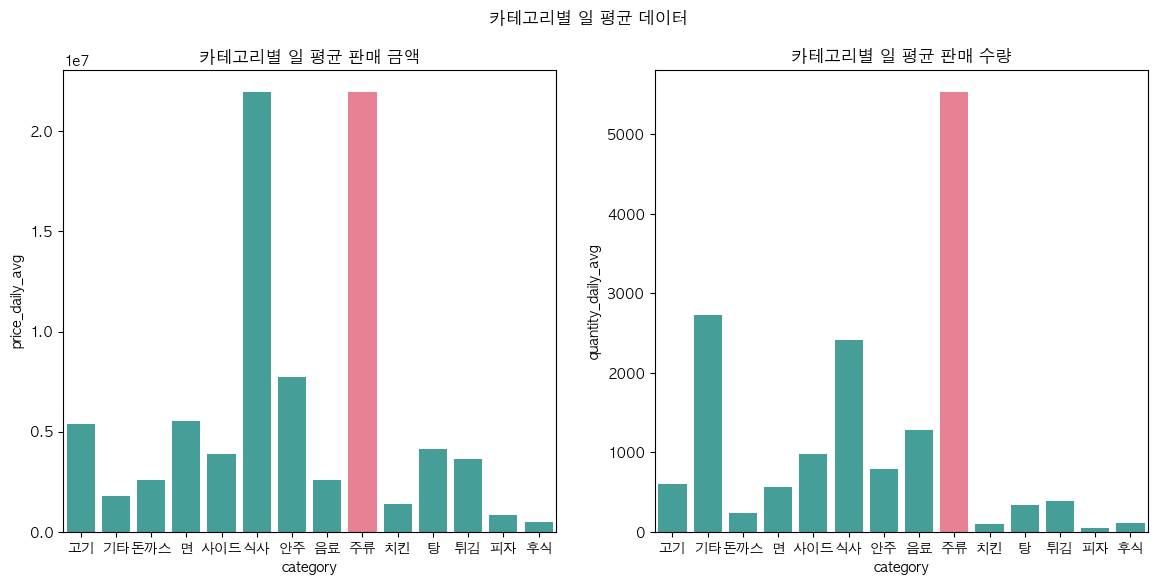

In [54]:
show_bar_plot_by_category(agg_df, "카테고리별 일 평균 데이터")

In [41]:
order_all = pd.merge(orders, merge_df, how='inner', left_on='id', right_on='order_id')

In [42]:
order_all.head()

,id,store_code,time_order,is_paid_order,is_first_order,is_error_exists,order_id,price,quantity,good_code,good_category,category
0,1,store_0,2022-11-01 07:09:00,False,True,False,1,10000.00000,1,0,식사류,식사
1,2,store_1,2022-11-01 07:12:00,False,True,False,2,10000.00000,1,1,순대국밥,식사
2,3,store_2,2022-11-01 07:19:00,False,True,False,3,9000.00000,1,2,순대국밥,식사
3,4,store_3,2022-11-01 07:28:00,False,False,False,4,15900.00000,1,3,고기류,고기
4,4,store_3,2022-11-01 07:28:00,False,False,False,4,3900.00000,1,4,메뉴숨기기,기타


In [43]:
order_all['time_order'] = pd.to_datetime(order_all['time_order'])

In [44]:
order_all['is_weekend'] = order_all['time_order'].apply(isWeekend)

In [45]:
order_all

,id,store_code,time_order,is_paid_order,is_first_order,is_error_exists,order_id,price,quantity,good_code,good_category,category,is_weekend
0,1,store_0,2022-11-01 07:09:00,False,True,False,1,10000.00000,1,0,식사류,식사,0
1,2,store_1,2022-11-01 07:12:00,False,True,False,2,10000.00000,1,1,순대국밥,식사,0
2,3,store_2,2022-11-01 07:19:00,False,True,False,3,9000.00000,1,2,순대국밥,식사,0
3,4,store_3,2022-11-01 07:28:00,False,False,False,4,15900.00000,1,3,고기류,고기,0
4,4,store_3,2022-11-01 07:28:00,False,False,False,4,3900.00000,1,4,메뉴숨기기,기타,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398035,380745,store_446,2022-12-01 06:24:00,False,True,False,380745,17000.00000,1,10991,요리,식사,0
398036,380746,store_1416,2022-12-01 06:26:00,False,True,False,380746,3000.00000,1,4183,소주&맥주,주류,0
398037,380746,store_1416,2022-12-01 06:26:00,False,True,False,380746,3900.00000,2,1919,소주&맥주,주류,0
398038,380747,store_21,2022-12-01 06:26:00,False,True,False,380747,4000.00000,1,10393,주류,주류,0


In [46]:
agg_df_with_week = order_all[['is_weekend', 'category', 'price', 'quantity']].groupby(['category', 'is_weekend']).sum()[['price', 'quantity']].reset_index()

In [47]:
agg_df_weekdays = agg_df_with_week[agg_df_with_week['is_weekend']==0]
agg_df_weekend = agg_df_with_week[agg_df_with_week['is_weekend']==1]

In [48]:
agg_df_weekdays['is_weekend'] = 'weekdays'
agg_df_weekend['is_weekend'] = 'weekend'

In [49]:
agg_df_weekdays['price_daily_avg'] = agg_df_weekdays['price']/22.0
agg_df_weekdays['quantity_daily_avg'] = agg_df_weekdays['quantity']/22.0

agg_df_weekend['price_daily_avg'] = agg_df_weekend['price']/8.0
agg_df_weekend['quantity_daily_avg'] = agg_df_weekend['quantity']/8.0

In [50]:
all_agg_df = pd.concat([agg_df_weekdays, agg_df_weekend])

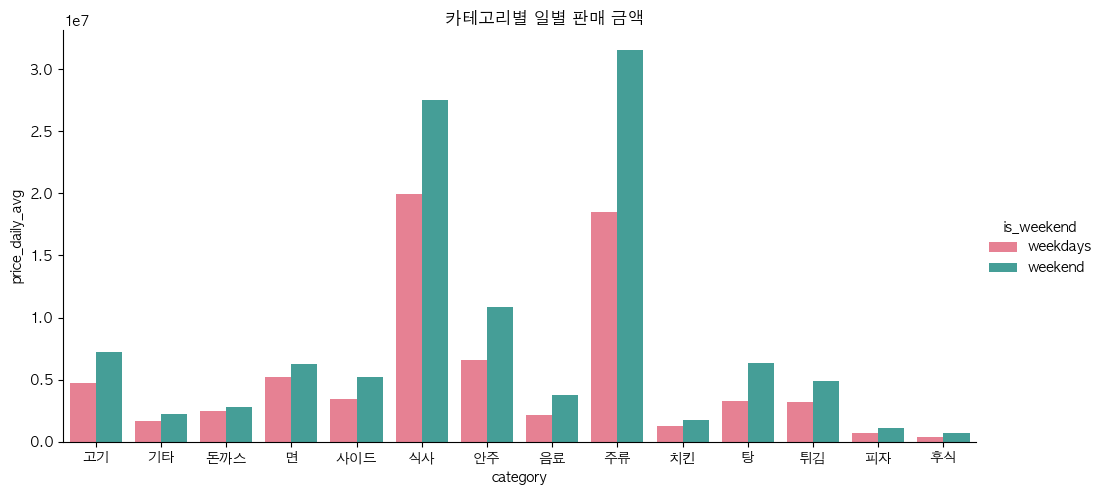

In [56]:
catplot = sns.catplot(data=all_agg_df, x='category', y='price_daily_avg', hue='is_weekend', kind='bar', palette='husl', aspect=2)
catplot.fig.suptitle("카테고리별 일별 판매 금액")
plt.show()

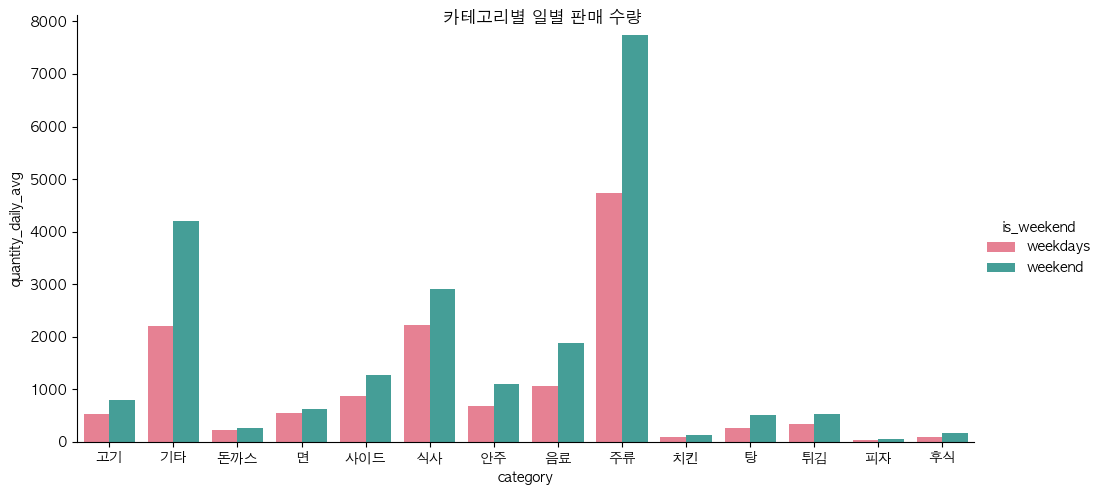

In [55]:
catplot = sns.catplot(data=all_agg_df, x='category', y='quantity_daily_avg', hue='is_weekend', kind='bar', palette='husl', aspect=2)
catplot.fig.suptitle("카테고리별 일별 판매 수량")
plt.show()